In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target
X.shape, y.shape

((569, 30), (569,))

In [ ]:
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

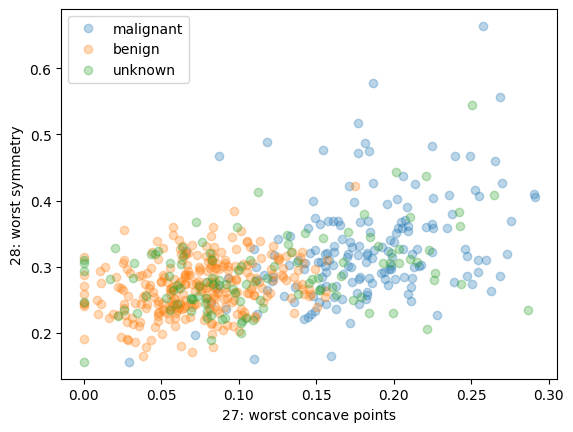

In [ ]:
import matplotlib.pyplot as plt
i, j = 27, 28
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(ytr):
  plt.plot(Xtr[:,i][ytr==k], Xtr[:,j][ytr==k], 'o', alpha=0.3, label=f"{dataset.target_names[k]}")
plt.plot(Xte[:,i], Xte[:,j], 'o', alpha=0.3, label=f"unknown")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class KNN(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    dist = np.sqrt(soma)
    return dist
  def predict(self, X, y=None):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred

In [ ]:
from sklearn.metrics import accuracy_score

modelo = KNN()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
accuracy_score(yte, ypred)

0.9298245614035088

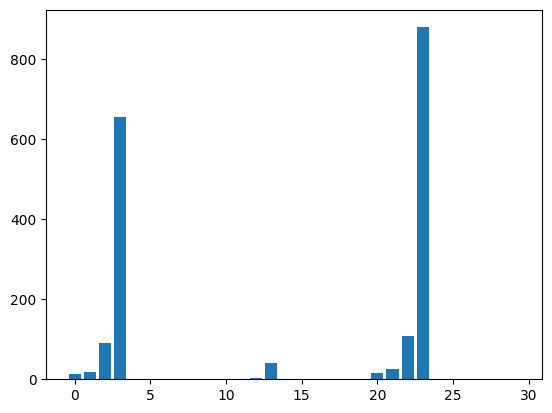

In [ ]:
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()

In [ ]:
from sklearn.linear_model import Perceptron

modelo = Perceptron()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
accuracy_score(yte, ypred)

0.9473684210526315

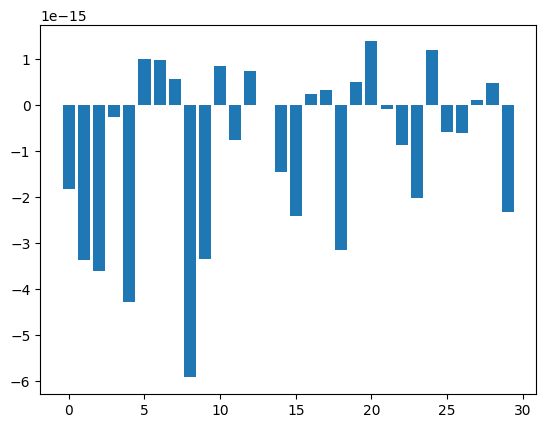

In [ ]:
# normalizando os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XtrN = scaler.fit_transform(Xtr)
XteN = scaler.transform(Xte)
plt.bar(list(range(X.shape[1])), np.mean(XtrN, axis=0))
plt.show()

In [ ]:
modelo = Perceptron()
modelo.fit(XtrN, ytr)
ypred = modelo.predict(XteN)
accuracy_score(yte, ypred)

0.9736842105263158

In [ ]:
modelo = KNN()
modelo.fit(XtrN, ytr)
ypred = modelo.predict(XteN)
accuracy_score(yte, ypred)

0.9385964912280702

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier()
modelo.fit(XtrN, ytr)
ypred = modelo.predict(XteN)
accuracy_score(yte, ypred)

0.9473684210526315

In [ ]:
# validação cruzada: em cada ciclo de treino e teste o classificador é resetado

In [ ]:
from sklearn.model_selection import cross_validate

modelo = KNeighborsClassifier(n_neighbors=1)
scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00115299, 0.00082684, 0.00079894, 0.0007937 , 0.00080609]),
  'score_time': array([0.01410341, 0.01099682, 0.0109632 , 0.01128268, 0.01087999]),
  'test_score': array([0.85964912, 0.92982456, 0.9122807 , 0.9122807 , 0.91150442])},
 0.9051079024996118)

In [ ]:
modelo = KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score']) # acurácia do KNN tende a melhorar ao aumentar o numero de vizinhos avaliados gradualmente

({'fit_time': array([0.0014379 , 0.00083804, 0.00116253, 0.00127316, 0.0010674 ]),
  'score_time': array([0.0316906 , 0.05754542, 0.01134586, 0.01175737, 0.01247144]),
  'test_score': array([0.87719298, 0.93859649, 0.94736842, 0.95614035, 0.9380531 ])},
 0.9314702685918336)

In [ ]:
# o KNN é um classificador estável, em uma mesma divisão de treino e teste sempre obterá também o mesmo resultado

In [ ]:
modelo = Perceptron()
scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score']) # acurácia do perceptron cai pois não estamos usando a base de dados normalizada

({'fit_time': array([0.01383829, 0.01160955, 0.01507378, 0.01477981, 0.01837897]),
  'score_time': array([0.00855422, 0.00139689, 0.02179646, 0.00138307, 0.01152468]),
  'test_score': array([0.92982456, 0.88596491, 0.87719298, 0.87719298, 0.84955752])},
 0.883946592144077)

In [ ]:
# o código a seguir possui um erro lógico que cria uma falsa estimativa de melhora
modelo = Perceptron()
scaler = StandardScaler()
scores = cross_validate(modelo, scaler.fit_transform(X), y) # quando utilizamos o cross validate dessa maneira, será feito o pré processamento antes da divisão de treino e teste, o que gera um resultado super otimista
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00283051, 0.00240946, 0.00495052, 0.00206256, 0.00196648]),
  'score_time': array([0.00112343, 0.00098252, 0.00090122, 0.00090241, 0.00084591]),
  'test_score': array([0.96491228, 0.96491228, 0.97368421, 0.95614035, 0.96460177])},
 0.9648501785437045)

In [ ]:
# a forma correta seria utilizar um pipeline
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", Perceptron())
])

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00446749, 0.00330281, 0.0025208 , 0.00225639, 0.00217223]),
  'score_time': array([0.00380659, 0.00087881, 0.00076723, 0.00075507, 0.00070834]),
  'test_score': array([0.95614035, 0.94736842, 0.97368421, 0.95614035, 0.98230088])},
 0.9631268436578171)

In [ ]:
# realizando o mesmo experimento para o KNN

In [ ]:
modelo = KNeighborsClassifier()
scaler = StandardScaler()
scores = cross_validate(modelo, scaler.fit_transform(X), y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00096798, 0.00062466, 0.00067425, 0.0006237 , 0.00064063]),
  'score_time': array([0.0134213 , 0.00923872, 0.00909662, 0.0106492 , 0.0089643 ]),
  'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])},
 0.9648501785437045)

In [ ]:
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", KNeighborsClassifier())
])

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score']) # apesar de não haver diferença do outro resultado, é importante seguir o método correto

({'fit_time': array([0.00326586, 0.00189877, 0.00183964, 0.00257683, 0.00185013]),
  'score_time': array([0.01258445, 0.00979328, 0.0104537 , 0.00992751, 0.01021123]),
  'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])},
 0.9648501785437045)